# ChatGPT Zero Playbook

<p>
Mal Minhas, v1.1<br>
21.01.24
</p>

<p>
<h4>Versions</h4>
<ul>
<li><b>v1.0</b>: 09.03.23. First version</li>
<li><b>v1.1</b>: 21.01.24. Updated along with dependencies for Python 3.12</li>
</ul>
</p>

You will need to `pip install` the following: `tiktoken`, `forex_python`, `boto3` and then configure AWS access by installing `awscli` and then configuring it from the command line using `aws configure`.

In [1]:
import dalle
import chatgpt
import awsrekognition as rekognition

In [2]:
model = 'gpt-4'
gpt = chatgpt.ChatGPT(model)
prompt_text, tokens, cost = gpt.getCompletion("Return me a DALL-E prompt for generating a photorealistic view a smart new white house with a nice garden", getTokens=True)
print(f'Used {tokens} tokens using {model} at cost of £{cost}.  Response text=')
prompt_text.strip()

Used 30 tokens using gpt-4 at cost of £0.001436.  Response text=


'"Create a highly detailed and photorealistic image of a modern, smart, white house with a beautiful and well-maintained garden in the foreground."'

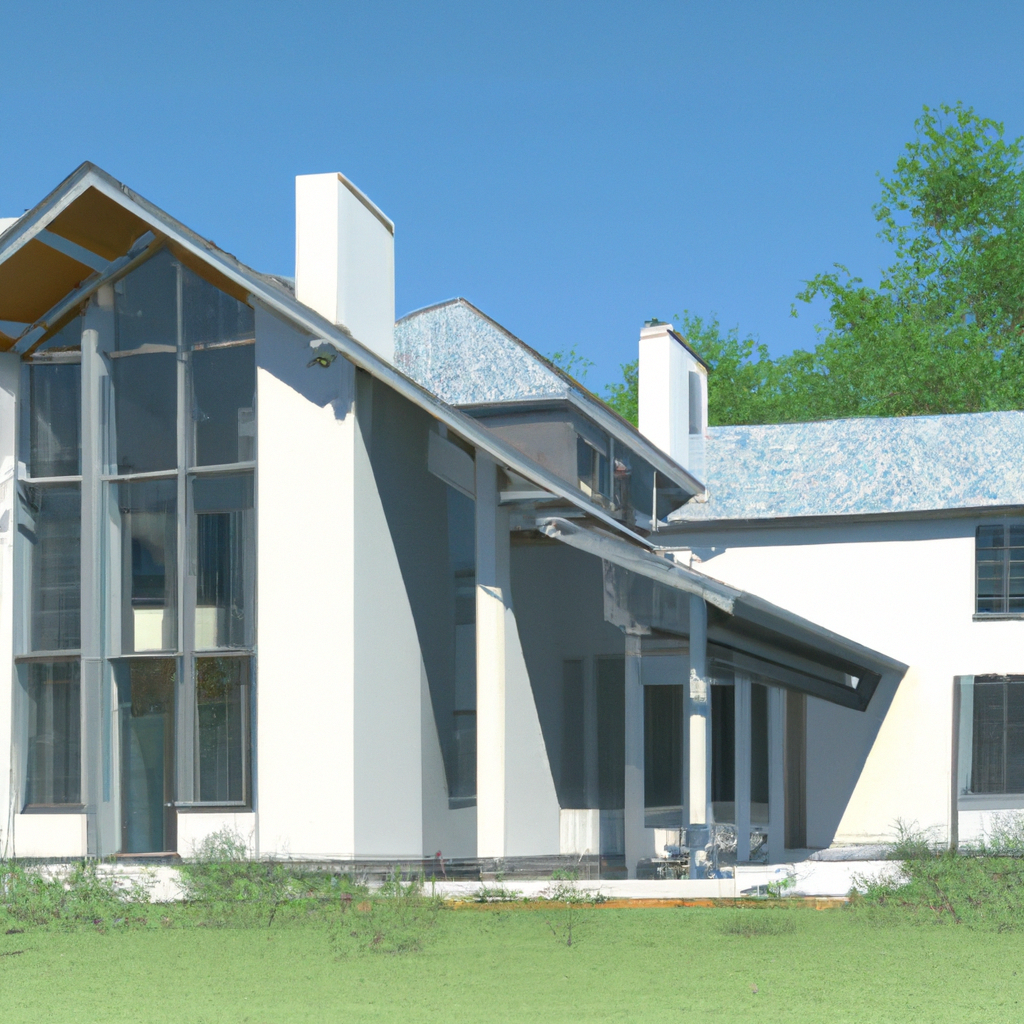

In [3]:
dalleh = dalle.Dalle()
dalle_image = 'zero_image.png'
image_url = dalleh.textToImage(prompt_text, dalle_image)
dalleh.displayImage(dalle_image)

In [4]:
response = rekognition.formatLabels(dalle_image)

('Grass', 99.95785522460938, [{'Name': 'Plants and Flowers'}], [])
('Building', 99.46987915039062, [{'Name': 'Buildings and Architecture'}], [{'BoundingBox': {'Width': 0.9659560918807983, 'Height': 0.7158749103546143, 'Left': 0.0, 'Top': 0.15558859705924988}, 'Confidence': 99.46987915039062}])
('Door', 99.16778564453125, [{'Name': 'Furniture and Furnishings'}], [])
('Housing', 99.16192626953125, [{'Name': 'Buildings and Architecture'}], [])
('Lawn', 96.69737243652344, [{'Name': 'Home and Indoors'}], [])
('House', 95.891845703125, [{'Name': 'Buildings and Architecture'}], [])
('Villa', 92.54109954833984, [{'Name': 'Buildings and Architecture'}], [])
('Portico', 72.89601135253906, [{'Name': 'Home and Indoors'}], [])
('Shelter', 57.998077392578125, [{'Name': 'Buildings and Architecture'}], [])
('Porch', 57.84003829956055, [{'Name': 'Home and Indoors'}], [])


Found bounding box for "Building"


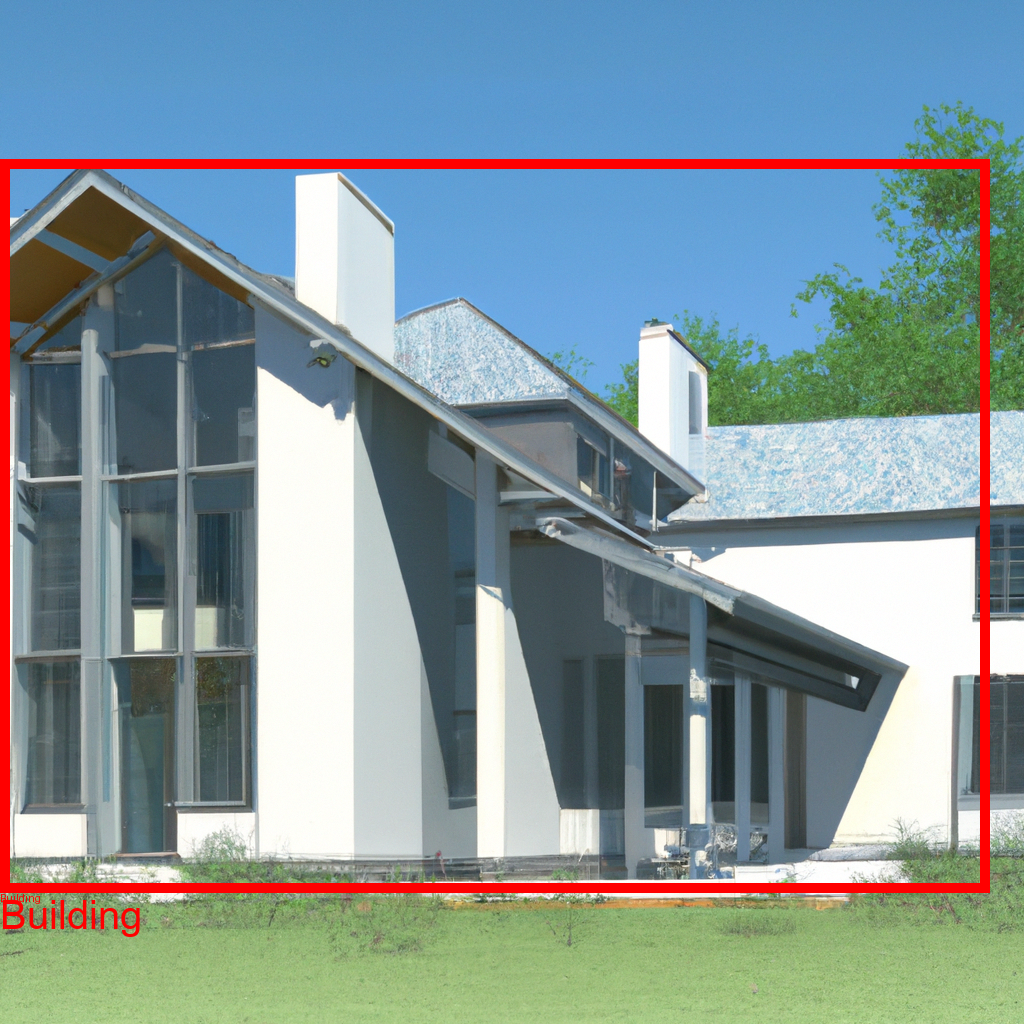

In [5]:
dalleh.displayImage(rekognition.drawBoundingBox(dalle_image, response))